In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [3]:
print(("Head of Train Data"),train_df.head())
print(("Shape of Train Data"), train_df.shape)

Head of Train Data    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500 

In [4]:
print(("Head of Test Data"),test_df.head())
print(("Shape of Test Data"), test_df.shape)

Head of Test Data    PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  
Shape of Test Data (418, 11)


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [7]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


Null Values in Train data
Age         177
Cabin       687
Embarked      2
dtype: int64


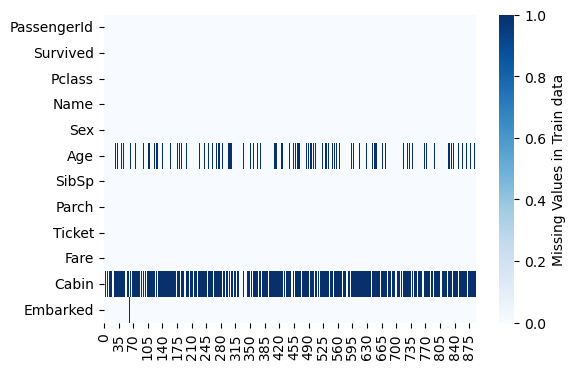

In [9]:
print("Null Values in Train data")
train_df_null  = train_df.isnull().sum()
print(train_df_null[train_df_null>0])

plt.figure(figsize=(6, 4))
sns.heatmap(train_df.isna().transpose(), cmap="Blues", cbar_kws={'label': 'Missing Values in Train data'})
plt.show()

Null Values in Test data
Age       86
Fare       1
Cabin    327
dtype: int64


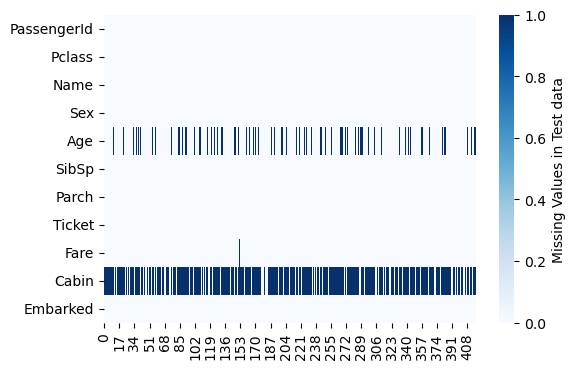

In [10]:
print("Null Values in Test data")
test_df_null  = test_df.isnull().sum()
print(test_df_null[test_df_null>0])

plt.figure(figsize=(6, 4))
sns.heatmap(test_df.isna().transpose(), cmap="Blues", cbar_kws={'label': 'Missing Values in Test data'})
plt.show()

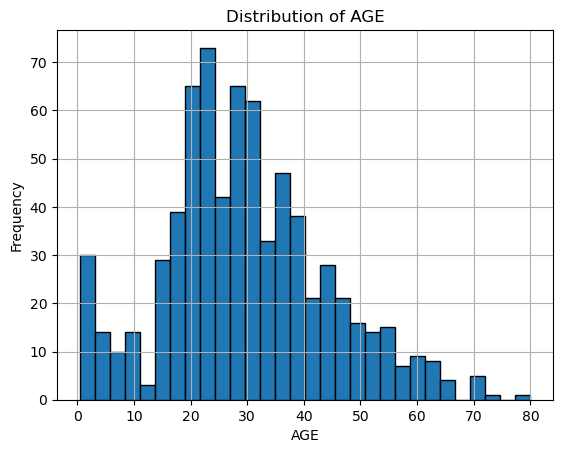

In [11]:
import matplotlib.pyplot as plt

train_df['Age'].hist(bins=30, edgecolor='black')
plt.title('Distribution of AGE')
plt.xlabel('AGE')
plt.ylabel('Frequency')
plt.show()

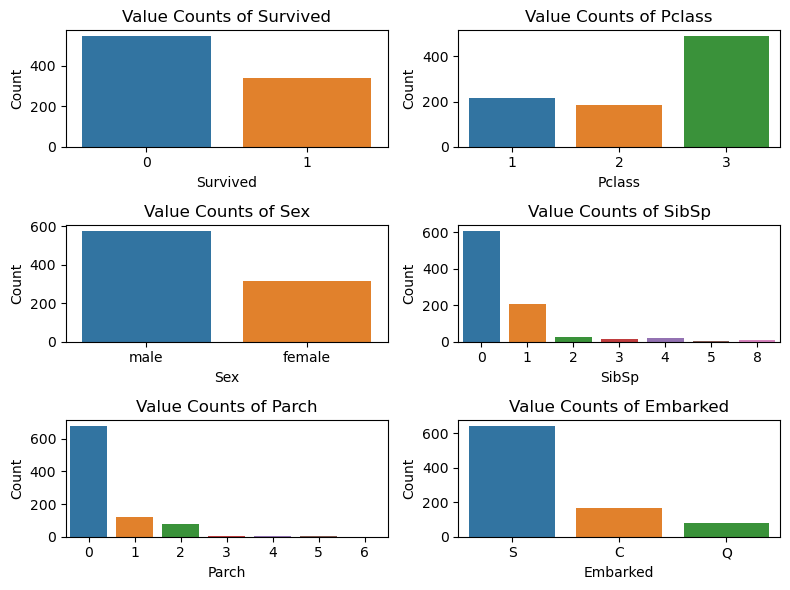

In [12]:
traindf_pl = [train_df['Survived'], train_df['Pclass'], train_df['Sex'], train_df['SibSp'], train_df['Parch'], train_df['Embarked']]
plot_names = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8, 6))
for i, ax in enumerate(axes.flatten()):
    sns.countplot(x=traindf_pl[i], ax=ax)
    ax.set_title(f'Value Counts of {plot_names[i]}')
    ax.set_xlabel(plot_names[i])
    ax.set_ylabel('Count')
plt.tight_layout()
plt.show()

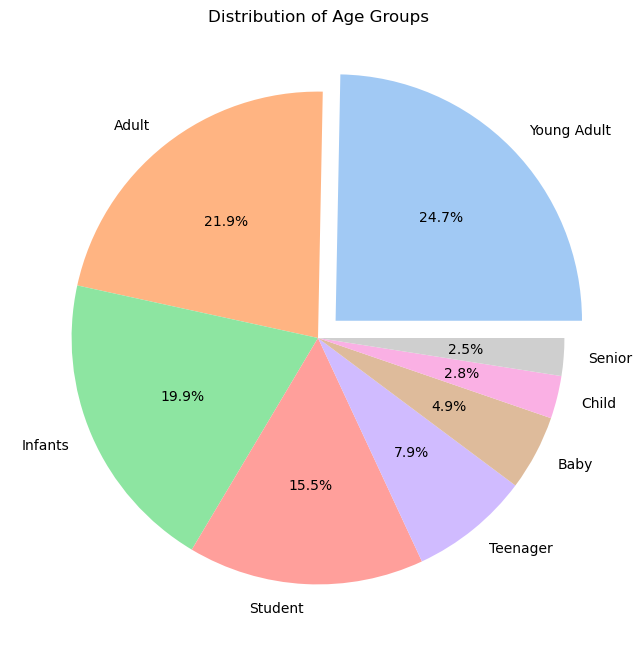

In [13]:
train_df["Age"] = train_df["Age"].fillna(-0.5)
test_df["Age"] = test_df["Age"].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Infants', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
train_df['AgeGroup'] = pd.cut(train_df["Age"], bins, labels=labels)
test_df['AgeGroup'] = pd.cut(test_df["Age"], bins, labels=labels)
plt.figure(figsize=(8, 8))
train_df['AgeGroup'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'), explode=(0.1, 0, 0, 0, 0, 0, 0, 0))
plt.title('Distribution of Age Groups')
plt.ylabel('')
plt.show()

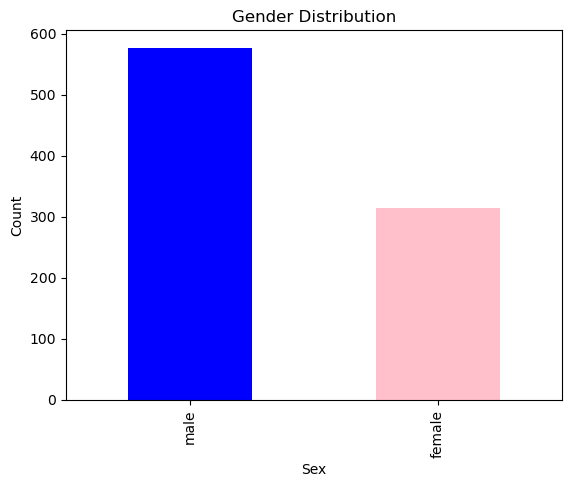

In [14]:
train_df['Sex'].value_counts().plot(kind='bar', color=['blue', 'pink'])
plt.title('Gender Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

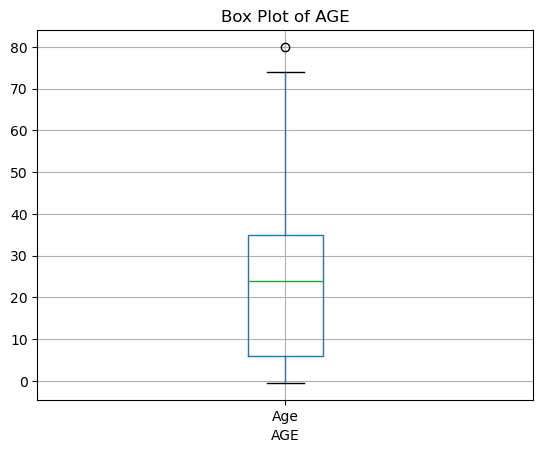

In [15]:
train_df.boxplot(column='Age')
plt.title('Box Plot of AGE')
plt.xlabel('AGE')
plt.show()

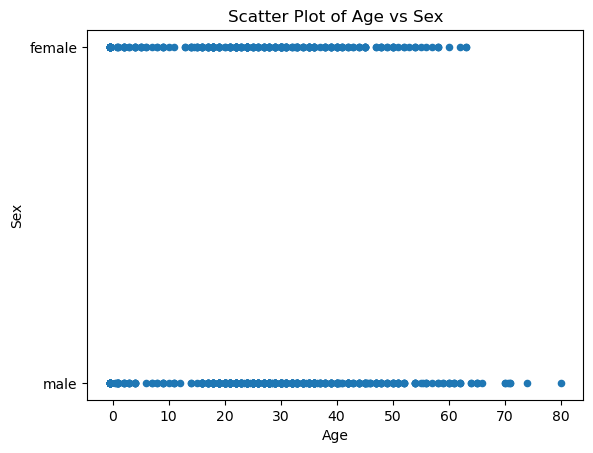

In [16]:
train_df.plot(kind='scatter', x='Age', y='Sex')
plt.title('Scatter Plot of Age vs Sex')
plt.xlabel('Age')
plt.ylabel('Sex')
plt.show()

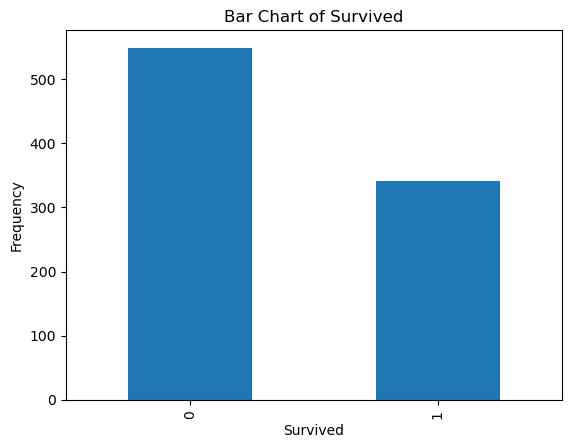

In [17]:
train_df['Survived'].value_counts().plot(kind='bar')
plt.title('Bar Chart of Survived')
plt.xlabel('Survived')
plt.ylabel('Frequency')
plt.show()


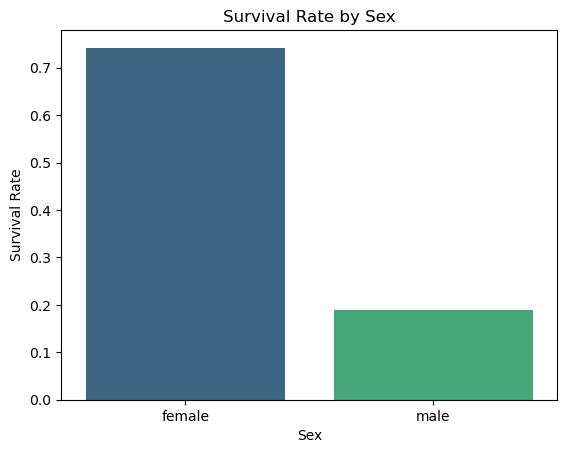

In [18]:
survival_rate_by_sex = train_df[['Sex', 'Survived']].groupby(['Sex']).mean().sort_values(by='Survived', ascending=False)
sns.barplot(x=survival_rate_by_sex.index, y='Survived', data=survival_rate_by_sex, palette='viridis')
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.show()

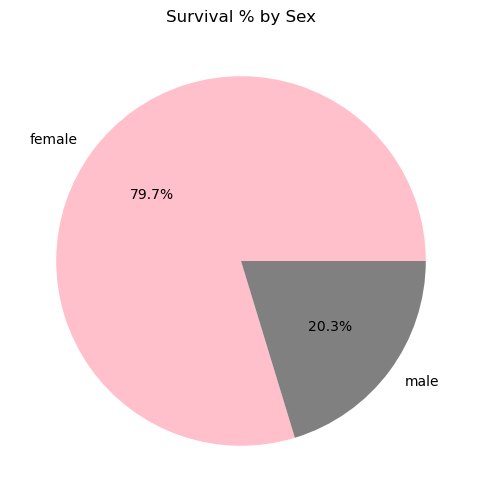

In [19]:
survived_sex = train_df.groupby(['Sex'])['Survived'].mean()
plt.figure(figsize=(8, 6))
plt.pie(survived_sex, labels=survived_sex.index, autopct='%1.1f%%', colors=['pink', 'gray'])
plt.title('Survival % by Sex')
plt.show()

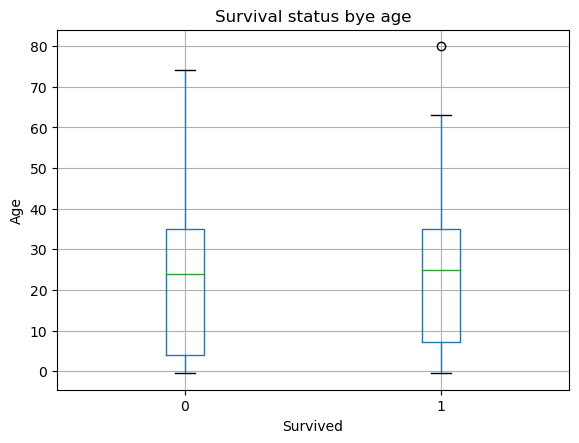

In [20]:
train_df.boxplot(column='Age', by='Survived')
plt.title('Survival status bye age')
plt.suptitle('')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()

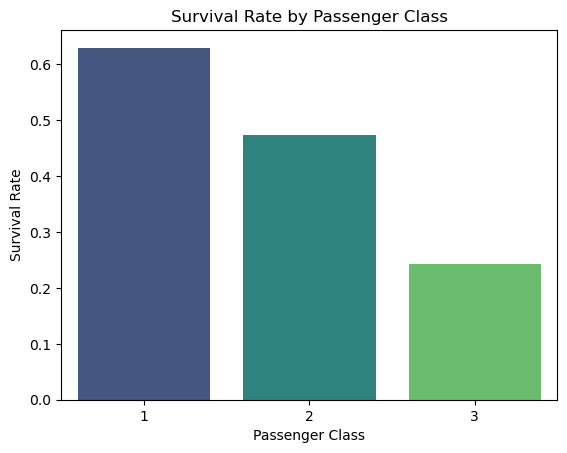

In [21]:
survival_rate_by_class = train_df[['Pclass', 'Survived']].groupby(['Pclass']).mean().sort_values(by='Survived', ascending=False)
sns.barplot(x=survival_rate_by_class.index, y='Survived', data=survival_rate_by_class, palette='viridis')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()


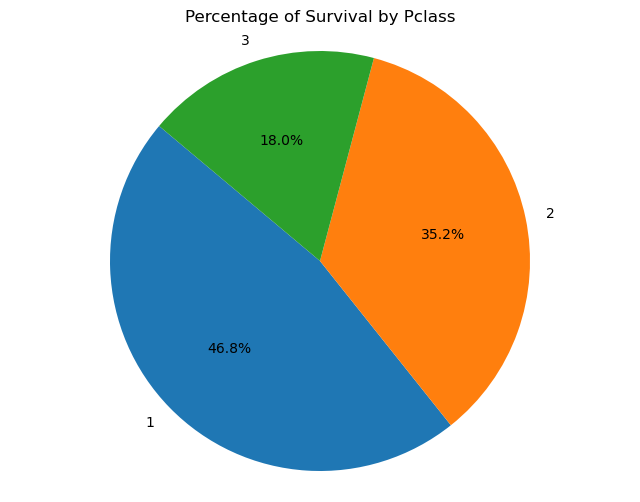

In [22]:
survived_percentage = train_df.groupby('Pclass')['Survived'].mean() * 100
plt.figure(figsize=(8, 6))
plt.pie(survived_percentage, labels=survived_percentage.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Survival by Pclass')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

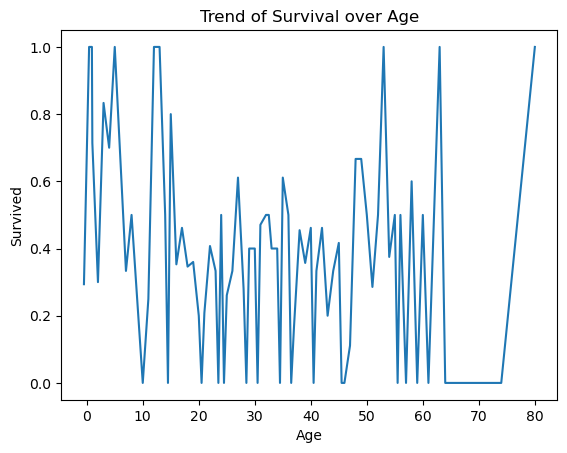

In [23]:
train_df.groupby('Age')['Survived'].mean().plot(kind='line')
plt.title('Trend of Survival over Age')
plt.xlabel('Age')
plt.ylabel('Survived')
plt.show()

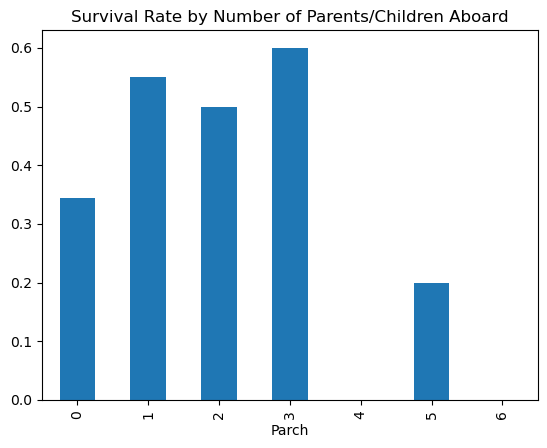

In [24]:
train_df.groupby('Parch')['Survived'].mean().plot(kind='bar')
plt.ylabel('')
plt.title('Survival Rate by Number of Parents/Children Aboard')
plt.show()

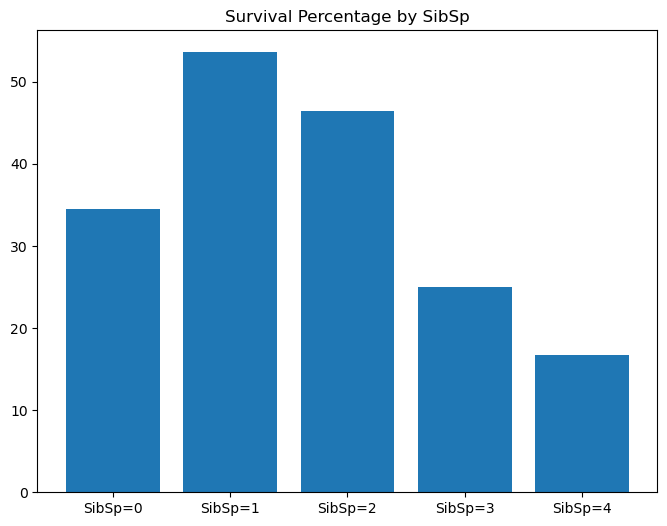

In [25]:
survival_percentages = [train_df["Survived"][train_df["SibSp"] == i].value_counts(normalize=True)[1] * 100 for i in range(5)]
plt.figure(figsize=(8, 6))
plt.bar(x=range(5),height=survival_percentages,tick_label=[f"SibSp={i}" for i in range(5)])
plt.title('Survival Percentage by SibSp')
plt.show()

In [26]:
train_df.dtypes

PassengerId       int64
Survived          int64
Pclass            int64
Name             object
Sex              object
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked         object
AgeGroup       category
dtype: object

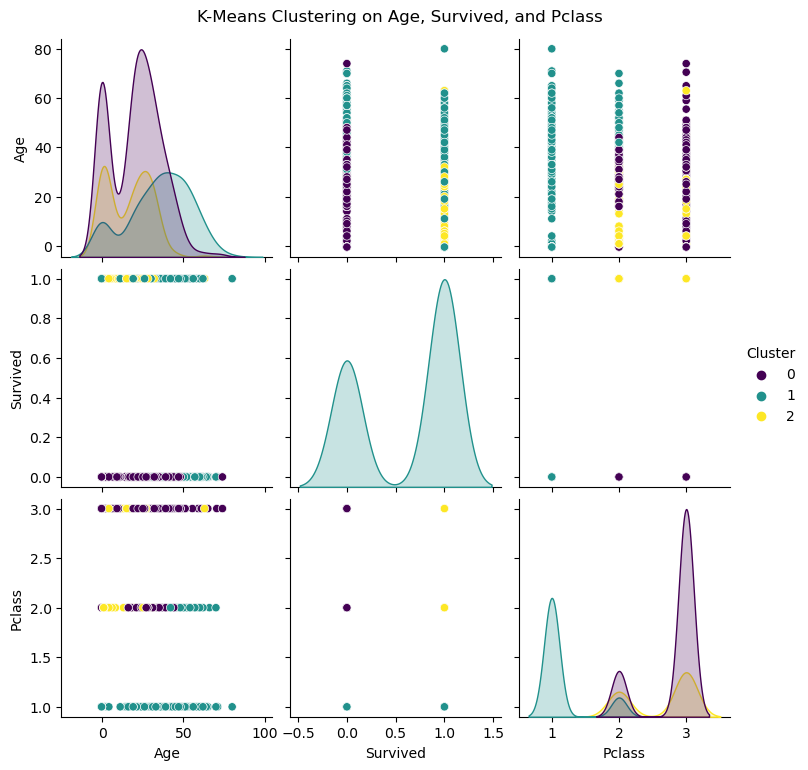

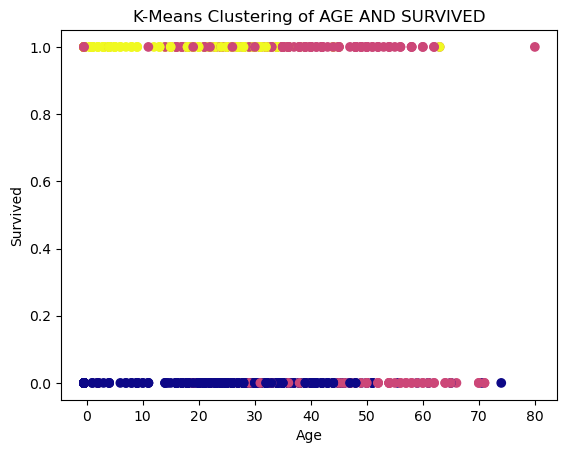

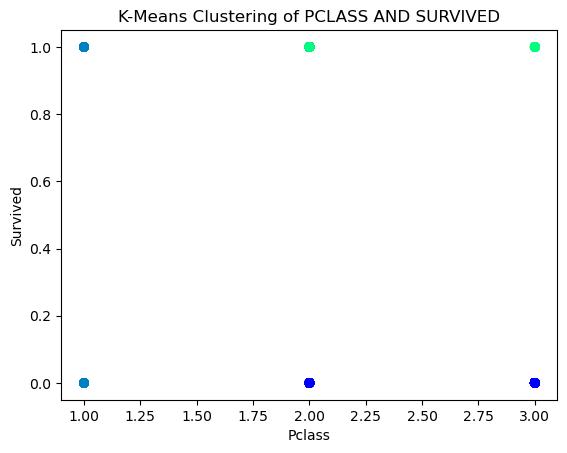

In [31]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)

# Select the features for clustering
X = train_df[['Age', 'Survived', 'Pclass']]

# Standardize the features (optional but recommended)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
train_df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualizing clusters: Use pairplot for better visualization of high-dimensional data
sns.pairplot(train_df, hue='Cluster', vars=['Age', 'Survived', 'Pclass'], palette='viridis')
plt.suptitle('K-Means Clustering on Age, Survived, and Pclass', y=1.02)
plt.show()

# Visualizing clusters with scatter plot for Age vs Pclass colored by clusters
plt.scatter(train_df['Age'], train_df['Survived'], c=train_df['Cluster'], cmap='plasma')
plt.title('K-Means Clustering of AGE AND SURVIVED')
plt.xlabel('Age')
plt.ylabel('Survived')
plt.show()
plt.scatter(train_df['Pclass'], train_df['Survived'], c=train_df['Cluster'], cmap='winter')
plt.title('K-Means Clustering of PCLASS AND SURVIVED')
plt.xlabel('Pclass')
plt.ylabel('Survived')
plt.show()

In [ ]:
train_df.dtypes